### <font color='red'> Project 3 : Buzz Prediction on Twitter

Project Description:
- Use same datasets as Project 2.
- Run all the models only on 10% data. Use code given in Project 2 for sampling.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply four voting classifiers - two with hard voting and two with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convetion:
    Project3_Regression_GroupXX_Firstname1_Firstname2.ipynb
    Project3_Classification_GroupXX_Firstname1_Firstname2.ipynb
- If you are submitting single file, then please follow below naming convetion:
    Project3_Both_GroupXX_Firstname1_Firstname2.ipynb

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

In [3]:
%matplotlib notebook
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##  Dataset For Regression Task
  
Following steps were taken to read and explore the dataset which we are going to use in this Project.

In [4]:
Dataset = pd.read_csv('Twitter.data', header = None)  #Reading Regression Dataset

In [80]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583250 entries, 0 to 583249
Data columns (total 78 columns):
0     583250 non-null int64
1     583250 non-null int64
2     583250 non-null int64
3     583250 non-null int64
4     583250 non-null int64
5     583250 non-null int64
6     583250 non-null int64
7     583250 non-null int64
8     583250 non-null int64
9     583250 non-null int64
10    583250 non-null int64
11    583250 non-null int64
12    583250 non-null int64
13    583250 non-null int64
14    583250 non-null float64
15    583250 non-null float64
16    583250 non-null float64
17    583250 non-null float64
18    583250 non-null float64
19    583250 non-null float64
20    583250 non-null float64
21    583250 non-null float64
22    583250 non-null float64
23    583250 non-null float64
24    583250 non-null float64
25    583250 non-null float64
26    583250 non-null float64
27    583250 non-null float64
28    583250 non-null int64
29    583250 non-null int64
30    583250 non-null

In [81]:
Dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,0,2,0,0,1,1,1,0,1,0,...,1.0,1.0,0,2,0,0,1,1,1,0.0
1,2,1,0,0,0,0,4,2,1,0,...,0.0,1.0,2,1,0,0,0,0,4,0.5
2,1,0,0,0,0,4,1,1,0,0,...,1.0,1.0,1,0,0,0,0,4,1,0.0
3,1,0,0,1,0,0,1,1,0,0,...,0.0,1.0,1,0,0,1,0,0,1,2.5
4,0,1,0,0,1,2,3,0,1,0,...,1.0,1.0,0,1,0,0,1,2,3,0.5


In [82]:
#Dataset.columns
Dataset[77].unique().astype(int)  #This is the Dependent variable

array([   0,    0,    2, ..., 4960, 4618, 2129])

In [8]:
Dataset[77].value_counts()     #Count of rows with unique values

0.5        20770
1.0        19299
0.0        19094
1.5        17510
2.0        15254
2.5        13557
3.0        11920
3.5        10781
4.0         9594
4.5         8609
5.0         7926
5.5         7422
6.0         6760
6.5         6294
7.0         5888
7.5         5433
8.0         5273
8.5         4971
9.0         4692
9.5         4614
10.0        4287
10.5        4025
11.0        3956
11.5        3816
12.0        3713
12.5        3643
13.0        3457
13.5        3315
14.0        3275
14.5        3215
           ...  
3623.0         1
3584.5         1
14486.0        1
3621.0         1
3618.0         1
3617.0         1
14463.5        1
3614.5         1
3613.0         1
3611.5         1
4498.0         1
14427.5        1
9324.0         1
6791.0         1
3603.5         1
4500.0         1
3602.5         1
3599.5         1
3599.0         1
3597.0         1
6290.0         1
3593.0         1
3591.0         1
6798.5         1
3589.0         1
2834.0         1
3587.5         1
3150.0        

<IPython.core.display.Javascript object>


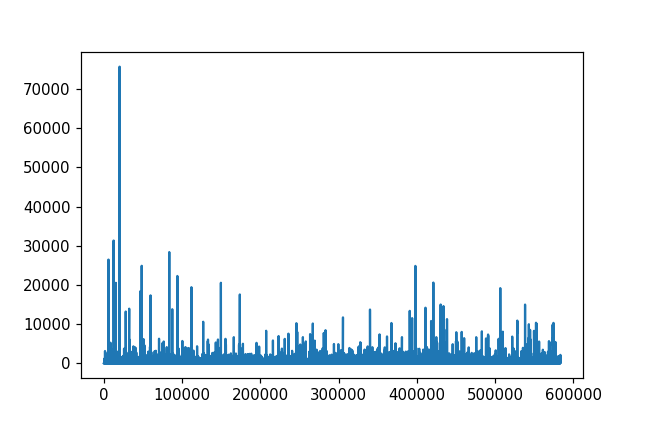

In [83]:
plt.plot(Dataset[77])

<IPython.core.display.Javascript object>


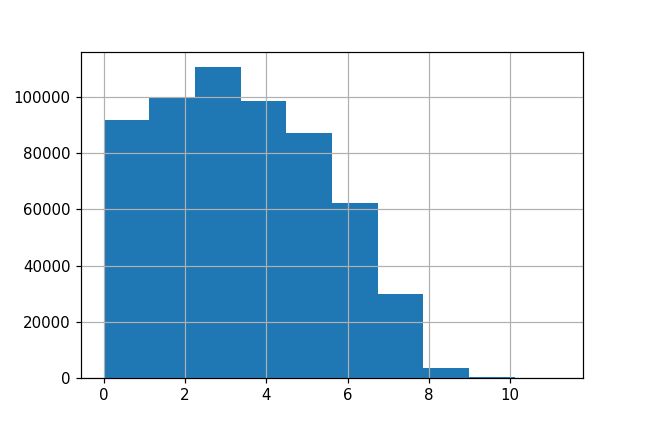

In [84]:
#Trying to understand distribution of dependent variable
np.log(Dataset[77]+1).hist()   #transforming to log and adding 1 to avoid -Inf
plt.show()

In [86]:
#Dataset.isnull().values.any()    #No Missing values
Dataset.isnull().sum().sum()  

0

The dataset does not have any missing values. Thus, no treatment is needed.  
We have plotted correlation between variables below:

In [9]:
corr = Dataset.corr()    #calculate correlation matrix

<IPython.core.display.Javascript object>


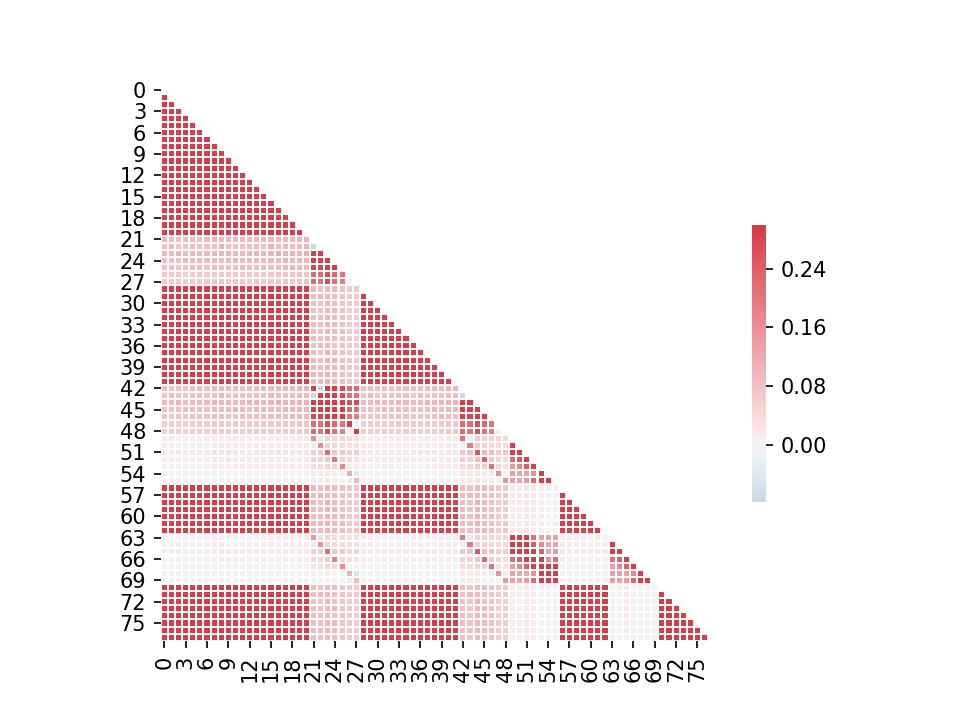

In [11]:
#Developing correlation plot

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [77]:
#Reading .names file
file = open("Twitter.names", "r")
for aline in file:
    #items = aline.split()
    print(aline)

1. Title of Database: Buzz prediction on Twitter





2. Sources:

   -- Creators : 

        FranÃ§ois Kawala (1,2) and 

        Ahlame Douzal (1) and 

        Eric Gaussier (1) and

        Eustache Diemert (2)



   -- Institutions : 

        (1) UniversitÃ© Joseph Fourier (Grenoble I)

            Laboratoire d'informatique de Grenoble (LIG)

        (2) BestofMedia Group



   -- Donor: BestofMedia (ediemert@bestofmedia.com)

   -- Date: May, 2013





3. Past Usage:

   -- References : 

        Predicting Buzz Magnitude in Social Media (in submission (ECML-PKDD 13))



   -- Predicted attribute : 

         Mean Number of active discussion (NAD). This attribute is a positive integer 

         that describe the popularity of the instance's topic. It is stored is 

         the rightmost column.



   -- Study results : 

        The results achieved are acceptable, nevertheless the unbalanced nature

        of this dataset leaves some room for improvement. The data may be sc

### Taking a random sample and Pre-process data
We take 10% random sample of dataset to try all the models and decide which model is the best.  
We will use that model for training the entire dataset then.

In [5]:
subData = Dataset.sample(frac=0.1, random_state = 0)    #Selecting a random sample of data

In [27]:
subData.shape

(58325, 78)

In [6]:
#Separating dependent and independent vars
X = pd.DataFrame(subData.iloc[:,0:77])
Y = subData[77]

#### Data Scaling
We will use MinMaxScaler to transform all the values in the dataset to range between 0 and 1. That way, it will be standardized.   We won't use StandardScaler as our dataset is not normally distributed and contains outliers.

In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,Y, random_state = 0)

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train_org)
X_test_scaled = scaler.transform(X_test_org)
X_train =  pd.DataFrame(X_train_scaled)
X_test = pd.DataFrame(X_test_scaled)

### Bagging and Pasting
We will apply Bagging and Pasting to several different models.  
When bootstrap parameter is set to True, it will be termed Bagging; otherwise, it is Pasting.
#### Bagging with Ridge Regression

In [12]:
from sklearn.ensemble import BaggingRegressor
from  sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.01)
bag_reg = BaggingRegressor(ridge, bootstrap=True)

bag_reg.fit(X_train,y_train)
train_score = bag_reg.score(X_train,y_train)
test_score = bag_reg.score(X_test, y_test)

In [13]:
print("Training Score:", train_score)
print("Testing Score:", test_score)

Training Score: 0.9599854394137373
Testing Score: 0.9544743401719618


In [14]:
report_table_1 = ['Bagging', 'Ridge Regression', train_score, test_score]

#### Bagging with SVM

In [8]:
from sklearn.ensemble import BaggingRegressor
from  sklearn import svm

clf = svm.SVR(kernel='linear', gamma=1e-07, epsilon=0.5)
bag_reg = BaggingRegressor(clf, bootstrap=True)

bag_reg.fit(X_train,y_train)
train_score = bag_reg.score(X_train,y_train)
test_score = bag_reg.score(X_test, y_test)

print("Training Score:", train_score)
print("Testing Score:", test_score)

Training Score: 0.6895049338641597
Testing Score: 0.7371441551049491


In [10]:
report_table_2 = ['Bagging', 'SVM', train_score, test_score]

#### Pasting with Linear Regression

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor

lreg = LinearRegression()
bag_reg = BaggingRegressor(lreg, bootstrap=False)
bag_reg.fit(X_train,y_train)

print("Training R^2:", bag_reg.score(X_train, y_train))
print("Testing R^2:", bag_reg.score(X_test, y_test))

Score = cross_val_score(bag_reg, X_train, y_train)
print("Cross Validation Scores:", Score)

Training R^2: 0.9605233015179824
Testing R^2: 0.9543604976065105
Cross Validation Scores: [0.9543462  0.95941212 0.95522252]


In [86]:
report_table_3 = ['Pasting', 'Linear Regression', bag_reg.score(X_train, y_train), bag_reg.score(X_test, y_test)]

#### Pasting with Lasso Regression

In [21]:
from sklearn.ensemble import BaggingRegressor
from  sklearn.linear_model import Lasso

lasso = Lasso(alpha = 0.01, max_iter= 30000)
bag_reg = BaggingRegressor(lasso, bootstrap=False)

bag_reg.fit(X_train, y_train)
train_score = bag_reg.score(X_train, y_train)
test_score = bag_reg.score(X_test, y_test)

print("Training Score:", train_score)
print("Testing Score:", test_score)

Training Score: 0.9596167126500394
Testing Score: 0.9536621115113779


In [22]:
report_table_4 = ['Pasting', 'Lasso Regression', train_score, test_score]

### Adaboost with Ridge Regression

In [23]:
from sklearn.ensemble import AdaBoostRegressor
from  sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.01)
adb_reg = AdaBoostRegressor(ridge)

adb_reg.fit(X_train, y_train)
train_score = adb_reg.score(X_train, y_train)
test_score = adb_reg.score(X_test, y_test)

print("Training Score:", train_score)
print("Testing Score:", test_score)

Training Score: 0.9355711641557559
Testing Score: 0.8873167562054248


In [24]:
report_table_5 = ['Adaboost', 'Ridge Regression', train_score, test_score]

### Adaboost with SGD Regressor
We are trying to implement several different models with various boosting methods.

In [33]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(random_state= 0, alpha = 1e-06, max_iter = 3000, learning_rate = 'constant', loss = 'squared_loss', penalty = 'l1')
adb_reg = AdaBoostRegressor(sgd_reg)

adb_reg.fit(X_train, y_train)
train_score = adb_reg.score(X_train, y_train)
test_score = adb_reg.score(X_test, y_test)

print("Training Score:", train_score)
print("Testing Score:", test_score)

Training Score: 0.9344922595680644
Testing Score: 0.875603793115981


In [34]:
report_table_6 = ['Adaboost', 'SGD Regression', train_score, test_score]

### PCA
We will apply PCA to the dataset to reduce number of features.  
I put 0.95 as the parameter, so 95% of the variance is retained from the data.

In [37]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X2D = pca.fit_transform(X)

In [39]:
pca.explained_variance_ratio_

array([0.90445112, 0.02641253, 0.01496144, 0.01454237])

We will find out how many components did it require to retain 95% of the variance from the data.

In [38]:
pca.n_components_

4

So, PCA reduced the features to just 4 and still retained 95% of the variance.  
Now the model training will be faster than earlier.
We will implement all the models from Project 2 again.

#### Pre-process data obtained after applying PCA.
We need to scale and split the data again.

In [40]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X2D, Y, random_state = 0)  #We put X2D here, which is obtained from PCA.

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train_org)
X_test_scaled = scaler.transform(X_test_org)
X_train =  pd.DataFrame(X_train_scaled)
X_test = pd.DataFrame(X_test_scaled)

### K Nearest Regressor

In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

params = {'n_neighbors':[2,3,4,5,6,7]}

knn = KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train, y_train)
model.best_params_

{'n_neighbors': 4}

We get n_neighbors = 4 from the GridSearch.   
Thus, we will train using n_neighbors = 4, which should be optimal.

In [42]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(4)
knn_reg.fit(X_train, y_train)
knn_train_score = knn_reg.score(X_train, y_train)
knn_test_score = knn_reg.score(X_test, y_test)

print(knn_train_score)
print(knn_test_score)


0.9444269255660641
0.9260108150990639


In [43]:
pca_report_table_1 = ['knn', 'n_neighbors = 4', knn_train_score, knn_test_score]

### Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print("Training R^2:", lreg.score(X_train, y_train))
print("Testing R^2:", lreg.score(X_test, y_test))

Score = cross_val_score(lreg, X_train, y_train)
print("Cross Validation Scores:", Score)

Training R^2: 0.931916010798806
Testing R^2: 0.9350747612499071
Cross Validation Scores: [0.91344653 0.93357781 0.92933105]


In [45]:
pca_report_table_2 = ['Linear Regression', 'Simple', lreg.score(X_train, y_train), lreg.score(X_test, y_test)]

### Polynomial Regression

We apply 2nd order polynomial regression.

In [46]:
from  sklearn.preprocessing  import PolynomialFeatures

poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
lreg.fit(X_train_poly, y_train)
poly_train_score = (lreg.score(X_train_poly, y_train))
poly_test_score = (lreg.score(X_test_poly, y_test))
    
print(poly_train_score)
print(poly_test_score)


0.9419071169845606
0.9172864352121882


In [52]:
pca_report_table_3 = ['Polynomial Regression', 'Order = 2', poly_train_score, poly_test_score]

### RIDGE Regression

In [48]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

In [49]:
print("Training Score:", train_score_list)
print("Testing Score:", test_score_list)

Training Score: [0.9319156619392958, 0.9318826877692565, 0.9296560751774837, 0.8811605330095261, 0.4664396581855539]
Testing Score: [0.9351588647672463, 0.9358611316468282, 0.9392124696788816, 0.9083180259302945, 0.49354038199939315]


**We can notice that the accuracy reduces as the alpha increases.**   
We will plot these values for better understanding.

<IPython.core.display.Javascript object>


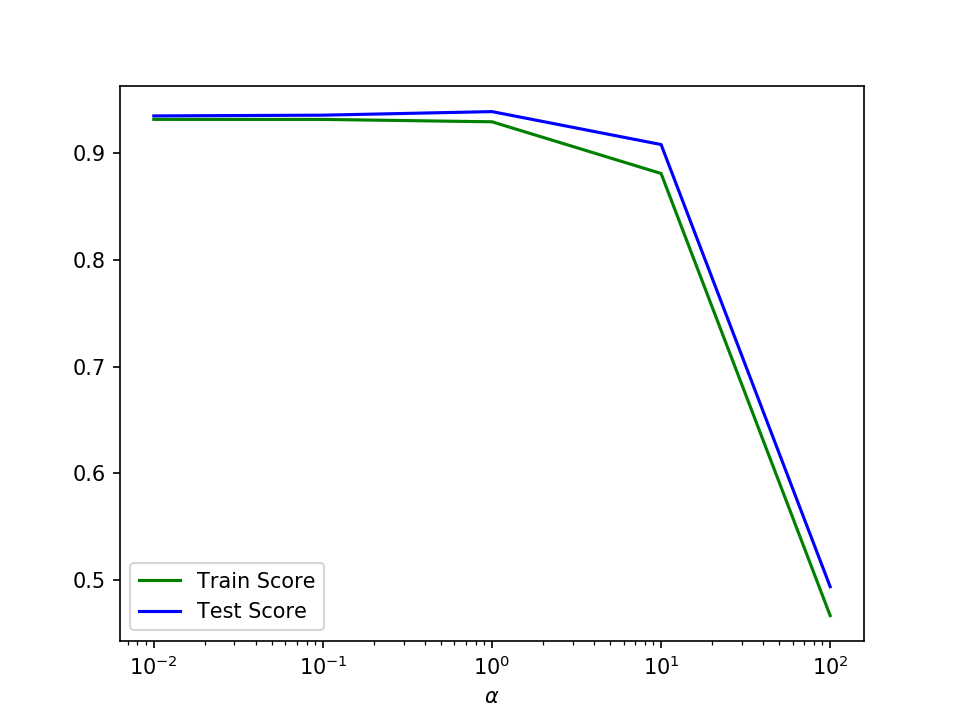

Text(0.5,0,'$\\alpha$')

In [50]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

We will use the optimum value of alpha to design the model, alpha value is 0.01 obtained from above graph.

In [51]:
ridge = Ridge(alpha = 0.01)
ridge.fit(X_train,y_train)
print('Train score: {:.4f}'.format(ridge.score(X_train,y_train)))
print('Test score: {:.4f}'.format(ridge.score(X_test, y_test)))

Train score: 0.9319
Test score: 0.9352


In [54]:
pca_report_table_4 = ['Ridge Regression', 'Alpha = 0.01', ridge.score(X_train, y_train), ridge.score(X_test, y_test)]

### LASSO Regression

In [56]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha, max_iter = 30000)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

I increased the max iterations in the above model as it was giving convergence warning.

In [57]:
print("Training Score:", train_score_list)
print("Testing Score:", test_score_list)

Training Score: [0.9319078533752905, 0.9311002674127545, 0.8913801184467184, 0.6396268320869871]
Testing Score: [0.9354101219946213, 0.9375663726661342, 0.912501275692679, 0.6737712591151048]


**Similar to ridge, We can notice that the accuracy reduces as the alpha increases.**   
We will plot these values for better understanding.

Text(0.5,0,'$\\alpha$')

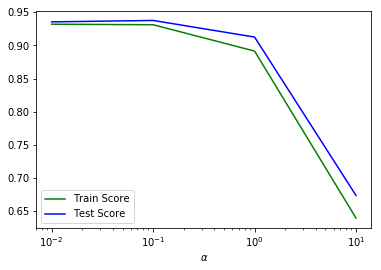

In [58]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

We will use the optimum value of alpha to design the model, alpha value is 0.01 obtained from above graph.

In [59]:
lasso = Lasso(alpha = 0.01, max_iter=30000)
lasso.fit(X_train,y_train)
print('Train score: {:.4f}'.format(lasso.score(X_train,y_train)))
print('Test score: {:.4f}'.format(lasso.score(X_test, y_test)))

Train score: 0.9319
Test score: 0.9354


In [60]:
pca_report_table_5 = ['Lasso Regression', 'Alpha = 0.01', lasso.score(X_train, y_train), lasso.score(X_test, y_test)]

### Support Vector Regression

In [61]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ('linear', 'rbf','poly'), 'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
svr = svm.SVR()
clf = GridSearchCV(svr, parameters)
clf.fit(X_train, y_train)
print(clf.best_params_)


{'epsilon': 0.5, 'gamma': 1e-07, 'kernel': 'linear'}


We will use the optimum parameters obtained from the Gridsearch as above to train the model.

In [62]:
clf = svm.SVR(kernel='linear', gamma=1e-07, epsilon=0.5)
clf.fit(X_train, y_train)
svr_train_score = clf.score(X_train, y_train)
svr_test_score = clf.score(X_test, y_test)
print(svr_train_score, svr_test_score)

-0.02279523145015561 -0.029955624967108237


In [63]:
pca_report_table_6 = ['Support Vector Regression', 'Linear Kernel, gamma = 1e-07, epsilon = 0.5', svr_train_score, svr_test_score]

### SGD Regressor

In [64]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

sgd_reg = SGDRegressor(random_state= 0)

param_grid = {
    'alpha': 10.0 ** -np.arange(1, 7),
    'loss': ['squared_loss', 'huber'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'learning_rate': ['constant', 'optimal'],
}

clf = GridSearchCV(sgd_reg, param_grid)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

{'alpha': 1e-06, 'learning_rate': 'constant', 'loss': 'squared_loss', 'penalty': 'l1'}
0.845410368630291


In [65]:
sgd_reg = SGDRegressor(random_state= 0, alpha = 1e-06, max_iter = 3000, learning_rate = 'constant', loss = 'squared_loss', penalty = 'l1')
sgd_reg.fit(X_train, y_train)
sgd_train_score = sgd_reg.score(X_train, y_train)
sgd_test_score = sgd_reg.score(X_test, y_test)
print(sgd_train_score)
print(sgd_test_score)

0.9314830196001518
0.934486061818746


In [66]:
pca_report_table_7 = ['SGD Regressor', 'squared_loss, alpha = 1e-06', sgd_train_score, sgd_test_score]

### Generating a Report table
For comparing all the models, we will create a table and a plot.

In [68]:
report_table_pca = pd.DataFrame(list(zip(pca_report_table_1,
             pca_report_table_2,
             pca_report_table_3,
             pca_report_table_4,
             pca_report_table_5,
             pca_report_table_6,
             pca_report_table_7))).transpose()

In [69]:
report_table_pca.columns = ['Model', 'Model Parameter', 'Train Score', 'Test Score']

The following table contains results without applying PCA and is copied from the Project 2.

In [69]:
report_table

,Model,Model Parameter,Train Score,Test Score
0,knn,n_neighbors = 4,0.950273,0.933612
1,Linear Regression,Simple,0.960523,0.95436
2,Polynomial Regression,Order = 2,0.98313,0.0277068
3,Ridge Regression,Alpha = 0.01,0.960191,0.954463
4,Lasso Regression,Alpha = 0.01,0.959617,0.953662
5,Support Vector Regression,"Linear Kernel, gamma = 1e-07, epsilon = 0.5",0.690586,0.738229
6,SGD Regressor,"squared_loss, alpha = 1e-06",0.957327,0.95146


The following table summarizes results after applying PCA:

In [70]:
report_table_pca

,Model,Model Parameter,Train Score,Test Score
0,knn,n_neighbors = 4,0.944427,0.926011
1,Linear Regression,Simple,0.931916,0.935075
2,Polynomial Regression,Order = 2,0.941907,0.917286
3,Ridge Regression,Alpha = 0.01,0.931916,0.935159
4,Lasso Regression,Alpha = 0.01,0.931908,0.93541
5,Support Vector Regression,"Linear Kernel, gamma = 1e-07, epsilon = 0.5",-0.0227952,-0.0299556
6,SGD Regressor,"squared_loss, alpha = 1e-06",0.931483,0.934486


We have visualized the results from the above table, i.e. results after applying PCA.  
As we can see the accuracy of models has been reduces a little bit, but the model training is much faster.  
Also, the data retains 95% of variance from the original data, so there can be a small discrepancy with the accuracies.  
**Thus, PCA has not helped improve the accuracy of the models, but it certainly has reduced our efforts in training these models.**

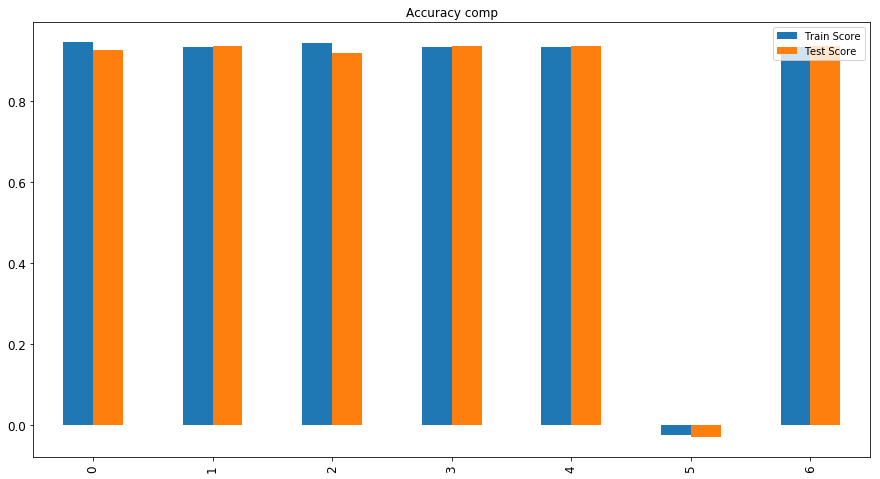

In [71]:
ax = report_table_pca[['Train Score','Test Score']].plot(kind='bar', title ="Accuracy comp", figsize=(15, 8), legend=True, fontsize=12)
plt.show()

## Deep Learning
Let's apply Deep learning model, we will use the original data instead of data obtained from the PCA for Deep learning model.

In [72]:
from keras.models import Sequential
from keras.layers import Dense
import numpy

# fix random seed for reproducibility
numpy.random.seed(10)

Using TensorFlow backend.


In [73]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,Y, random_state = 0)

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train_org)
X_test_scaled = scaler.transform(X_test_org)
X_train =  pd.DataFrame(X_train_scaled)
X_test = pd.DataFrame(X_test_scaled)

#### 1- Define Model

In [110]:
# create model
model = Sequential()
model.add(Dense(30, input_dim=77, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

#### 2- Compile Model

In [111]:
# Compile model
model.compile(loss='mse', optimizer='adam' , metrics = ['mse'])

#### 3- Fit Model

In [118]:
model.fit(X_train, y_train, epochs = 50, batch_size=20)

Epoch 1/50
43743/43743 [==============================] - 4s 82us/step - loss: 40012.7303 - mean_squared_error: 40012.7303
Epoch 2/50
43743/43743 [==============================] - 3s 76us/step - loss: 39583.2914 - mean_squared_error: 39583.2914
Epoch 3/50
43743/43743 [==============================] - 3s 78us/step - loss: 39176.7714 - mean_squared_error: 39176.7714
Epoch 4/50
43743/43743 [==============================] - 3s 79us/step - loss: 38820.2293 - mean_squared_error: 38820.2293
Epoch 5/50
43743/43743 [==============================] - 3s 73us/step - loss: 38445.4369 - mean_squared_error: 38445.4369
Epoch 6/50
43743/43743 [==============================] - 3s 79us/step - loss: 38030.2010 - mean_squared_error: 38030.2010
Epoch 7/50
43743/43743 [==============================] - 4s 81us/step - loss: 37710.7216 - mean_squared_error: 37710.7216
Epoch 8/50
43743/43743 [==============================] - 3s 78us/step - loss: 37278.3987 - mean_squared_error: 37278.3987
Epoch 9/50
43743

#### 4- Evaluate model

In [119]:
model.evaluate(X_test, y_test)

14582/14582 [==============================] - 0s 18us/step


[21436.755213713288, 21436.755213713288]

In [121]:
from sklearn.metrics import r2_score

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

print('Train score: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(y_test, y_test_predict)))

Train score: 0.93
Test score: 0.93


** To sum up, All the models give us a little bit better accuracy when using any kind of boosting or ensemble method.  
we can notice that all the models yield average an accuracy of 93% after applying PCA.   
And the deep learning model also gets us approximately 93% of accuracy. **


In [67]:
#Generate a beep to notify when code finishes running
import winsound
duration = 1500  # millisecond
freq = 440  # Hz
winsound.Beep(freq, duration)